<a href="https://colab.research.google.com/github/acealrawi/NLP/blob/main/DistillBert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Installing the libraries
!pip install datasets transformers huggingface_hub

In [ ]:
from datasets import load_dataset
women_clothing= load_dataset("saattrupdan/womens-clothing-ecommerce-reviews")


In [ ]:
women_clothing

DatasetDict({
    train: Dataset({
        features: ['review_text', 'age', 'rating', 'positive_feedback_count', 'division_name', 'department_name', 'class_name', 'recommended_ind'],
        num_rows: 20641
    })
    test: Dataset({
        features: ['review_text', 'age', 'rating', 'positive_feedback_count', 'division_name', 'department_name', 'class_name', 'recommended_ind'],
        num_rows: 1000
    })
    val: Dataset({
        features: ['review_text', 'age', 'rating', 'positive_feedback_count', 'division_name', 'department_name', 'class_name', 'recommended_ind'],
        num_rows: 1000
    })
})

In [ ]:
train_set = women_clothing["train"]
train_set

Dataset({
    features: ['review_text', 'age', 'rating', 'positive_feedback_count', 'division_name', 'department_name', 'class_name', 'recommended_ind'],
    num_rows: 20641
})

In [ ]:
train_set[0]

{'review_text': 'I loved this shirt until the first time i washed it. it shrunk so much it became unwearable. when i returned it the salesperson said she had also bought this shirt and the same thing happened.',
 'age': 39,
 'rating': 1,
 'positive_feedback_count': 0,
 'division_name': 'General',
 'department_name': 'Tops',
 'class_name': 'Knits',
 'recommended_ind': 0}

In [ ]:
#converting it into pandas
women_clothing.set_format(type="pandas")
df=women_clothing["train"][:]
df.head()

review_text  age  rating  \
0  I loved this shirt until the first time i wash...   39       1   
1  This sweater was unflattering me, very boxy an...   44       3   
2  I fell in love with these bottoms at first sit...   41       5   
3  I love the dress!  i purchased this dress to w...   34       5   
4  I fell in love with this dress when i saw it o...   46       5   

   positive_feedback_count   division_name department_name class_name  \
0                        0         General            Tops      Knits   
1                        0         General            Tops   Sweaters   
2                        2         General         Bottoms      Pants   
3                        0         General         Dresses    Dresses   
4                        0  General Petite         Dresses    Dresses   

   recommended_ind  
0                0  
1                0  
2                1  
3                1  
4                1

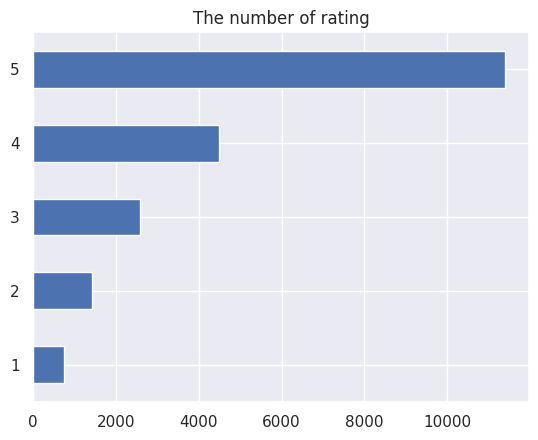

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
df["rating"].value_counts(ascending=True).plot.barh()
plt.title("The number of rating")
plt.show()

In [ ]:
women_clothing.reset_format()

*Tokenize*

In [ ]:
!pip install -q transformers

In [ ]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_function(batch):
  return tokenizer(batch["review_text"], padding=True, truncation=True)


In [ ]:
print(tokenize_function(women_clothing["train"][:2]))

{'input_ids': [[101, 1045, 3866, 2023, 3797, 2127, 1996, 2034, 2051, 1045, 8871, 2009, 1012, 2009, 14021, 15532, 2243, 2061, 2172, 2009, 2150, 4895, 16689, 3085, 1012, 2043, 1045, 2513, 2009, 1996, 4341, 27576, 2056, 2016, 2018, 2036, 4149, 2023, 3797, 1998, 1996, 2168, 2518, 3047, 1012, 102], [101, 2023, 14329, 2001, 4895, 10258, 20097, 2075, 2033, 1010, 2200, 3482, 2100, 1998, 2106, 2025, 2991, 2006, 2033, 2066, 1996, 2944, 1012, 3730, 8313, 1998, 3504, 3835, 2125, 1010, 2174, 2023, 2028, 2253, 2067, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}


In [ ]:
tokenized_datasets = women_clothing.map(tokenize_function, batched = True, batch_size = None)

In [ ]:
print(tokenized_datasets["train"].column_names)

['review_text', 'age', 'rating', 'positive_feedback_count', 'division_name', 'department_name', 'class_name', 'recommended_ind', 'input_ids', 'attention_mask']


In [ ]:
from transformers import AutoModelForSequenceClassification
import torch
checkpoint = "distilbert-base-uncased"
device= torch.device("cuda" if torch.cuda.is_available() else "cpu")
model= (AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels = 6).to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from sklearn.metrics import accuracy_score, f1_score
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1+ f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)
  return {"Accuracy": acc, "f1" : f1}

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
!pip install transformers -U


In [ ]:
!pip install accelerate -U


In [ ]:
from transformers import TrainingArguments, Trainer
# Assuming that 'recommended_ind' is your label column, you can add it to your tokenized dataset
tokenized_datasets["train"] = tokenized_datasets["train"].remove_columns(["review_text", "age", "rating", "positive_feedback_count", "division_name", "department_name", "class_name"])
tokenized_datasets["train"] = tokenized_datasets["train"].rename_column("recommended_ind", "label")

In [ ]:
training_args = TrainingArguments(
    output_dir="finetuning-women_clothing-model",
    num_train_epochs=2,
    learning_rate=2e-5,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    disable_tqdm=False,
    push_to_hub=True,
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["val"],
    tokenizer=tokenizer,
)

In [ ]:
trainer.train()

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
